<a href="https://colab.research.google.com/github/bitnarahyo/hyotudy/blob/master/%EC%A7%80%EB%8F%84%EC%83%81%EC%97%90%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%ED%94%8C%EB%A1%9C%ED%8C%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 지도상에 데이터 플로팅

python Basemap 툴킷을 이용하여 지도 배경에 겹쳐서 플로팅해보겠습니다. 

In [37]:
# 워킹 디렉토리 위치 설정
import os
os.chdir("/content/sample_data")

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

asos = pd.read_csv('META_관측.csv')

In [39]:
# asos 관측지점정보 데이터 확인
asos.head()

,지점,시작일,종료일,지점명,지점주소,관리관서,위도,경도,노장해발고도(m),기압계(관측장비지상높이(m)),기온계(관측장비지상높이(m)),풍속계(관측장비지상높이(m)),강우계(관측장비지상높이(m))
0,90,1968-01-01,NaN,속초,강원도 고성군토성면 봉포5길9 속초자동기상관측소,속초기상대(90),38.2509,128.5647,17.53,18.73,1.7,10.0,1.4
1,93,2016-10-01,NaN,북춘천,강원도 춘천시신북읍 산천리264(장본1길 12) 춘천기상대,춘천기상대(101),37.9474,127.7544,95.78,96.78,1.5,10.0,1.4
2,95,1988-01-01,NaN,철원,강원도 철원군갈말읍 명성로179번길 26 철원자동기상관측소,춘천기상대(101),38.1479,127.3042,155.48,156.98,1.8,13.0,1.5
3,98,1998-02-01,NaN,동두천,경기도 동두천시방죽로 16-47동두천서비스센터,수도권기상청(119),37.9019,127.0607,115.62,116.74,1.7,10.0,1.0
4,99,2013-10-22,NaN,파주,경기도 파주시문산읍 마정로46-29(파주기상대),수도권기상청(119),37.8859,126.7665,30.59,31.99,1.7,10.0,1.0


In [40]:
# 위도 경도 데이터 추출
lat = asos['위도'].values
lon = asos['경도'].values

In [41]:
# basemap 툴킷 활성화
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

from mpl_toolkits.basemap import Basemap

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756175 sha256=c5ef7f8672620faba9dd2b77788275c201c20145e8843546fa426effdd3b5134
  Stored in directory: /tmp/pip-ephem-wheel-cache-xvcfk1sq/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


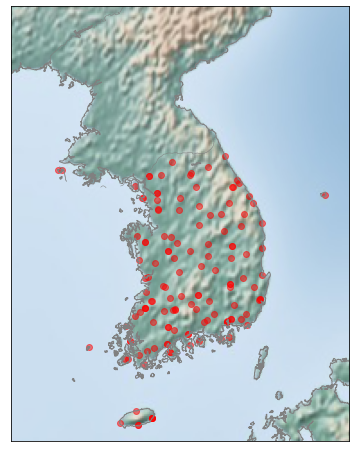

In [36]:
# 1. 지도 배경 그리기
fig = plt.figure(figsize=(8,8))
m = Basemap(projection='lcc', resolution='h',
            lat_0=37, lon_0=127.5,
            width=7E5, height=9E5)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. 지도 위에 장소 표시
m.scatter(lon, lat, latlon=True,
          alpha=0.5, color='red')

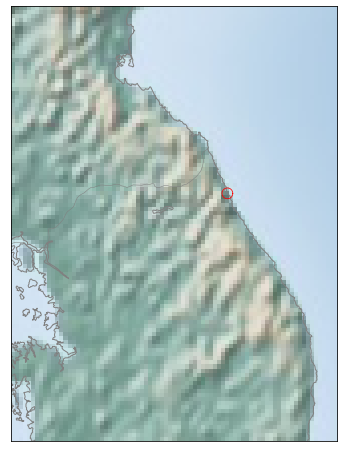

In [51]:
# 1. 지도 배경 그리기
fig = plt.figure(figsize=(8,8))
m = Basemap(projection='lcc', resolution='h',
            lat_0=38, lon_0=128,
            width=3E5, height=4E5)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. 특정 장소로부터 반경 5km 원 그리기
mx,my=m(128.5647,38.2509)   # 위도, 경도로 특정 장소 stn=90(속초) 지정

# 반경 몇 km로 원 그릴수 있는 함수 작성
def genCircle2(cx=0, cy=0, rad=1):
    """Generate points along perimeters of a circle"""
    points = []
    segs = 20
    for ea in range(segs+1):
        xi = cx + rad*np.cos(ea*2.*np.pi/segs)
        yi = cy + rad*np.sin(ea*2.*np.pi/segs)
        points.append([xi,yi])
    return np.array(points)
    
cclpnts = genCircle2(cx=mx, cy=my, rad=5000.) # 5km 반경 원 지정
m.plot(cclpnts[:,0], cclpnts[:,1], 
       label='Sokcho 5km circle', color="red", linewidth=0.75) # 원그리기
plt.show()

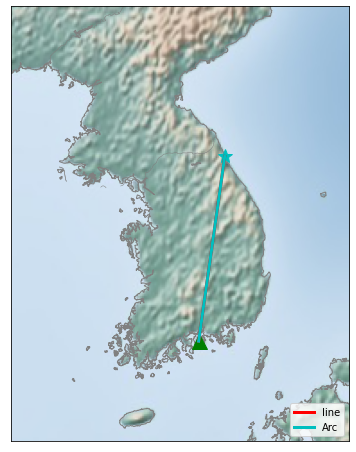

In [71]:
# 1. 지도 배경 그리기
fig = plt.figure(figsize=(8,8))
m = Basemap(projection='lcc', resolution='h',
            lat_0=37, lon_0=127.5,
            width=7E5, height=9E5)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. 장소간 선으로 연결하기
xs = []
ys = []

SClat, SClon = 38.2509, 128.5647  # 속초(stn=90) 위도, 경도 입력
xpt, ypt = m(SClon, SClat)
xs.append(xpt)
ys.append(ypt)
m.plot(xpt, ypt, 'c*', markersize=15)

NHlat, NHlon = 34.8166, 127.9264 # 남해(stn=295) 위도, 경도 입력
xpt, ypt = m(NHlon, NHlat)
xs.append(xpt)
ys.append(ypt)
m.plot(xpt, ypt, 'g^', markersize=15)

m.plot(xs, ys, color='r', linewidth=3, label='line') # 직선으로 그리기
m.drawgreatcircle(SClon, SClat, NHlon, NHlat, color='c', linewidth=3, del_s=200, label='Arc') # 포물선으로 그리기

plt.legend(loc=4)